In [1]:
import yfinance as yf
import pandas as pd

# Download Tesla stock data (TSLA)
tesla_data = yf.download('TSLA', start='2020-01-01', end='2025-03-27')

# Preview the first few rows
print(tesla_data.head())

# Save the data to a CSV file for future use
tesla_data.to_csv('Tesla_Stock_Data.csv')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           TSLA       TSLA       TSLA       TSLA       TSLA
Date                                                             
2020-01-02  28.684000  28.713333  28.114000  28.299999  142981500
2020-01-03  29.534000  30.266666  29.128000  29.366667  266677500
2020-01-06  30.102667  30.104000  29.333332  29.364668  151995000
2020-01-07  31.270666  31.441999  30.224001  30.760000  268231500
2020-01-08  32.809334  33.232666  31.215334  31.580000  467164500


In [3]:
import pandas as pd

# Load the CSV file without parsing dates
tesla_data = pd.read_csv('Tesla_Stock_Data.csv')
print(tesla_data.columns)  # View column names

Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [4]:
import yfinance as yf

# Fetch Tesla stock data
tesla_data = yf.download('TSLA', start='2020-01-01', end='2025-03-27')

# Save it correctly with the date included
tesla_data.to_csv('Tesla_Stock_Data.csv')

[*********************100%***********************]  1 of 1 completed


In [6]:
tesla_data = pd.read_csv('Tesla_Stock_Data.csv', header=None)

In [8]:
import yfinance as yf

# Fetch Tesla stock data
tesla_data = yf.download('TSLA', start='2020-01-01', end='2025-03-27')

# Save it correctly with the date included
tesla_data.to_csv('Tesla_Stock_Data.csv')

[*********************100%***********************]  1 of 1 completed


In [9]:
# Preview the structure and first rows of Tesla's stock data
print(tesla_data.info())
print(tesla_data.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1315 entries, 2020-01-02 to 2025-03-26
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, TSLA)   1315 non-null   float64
 1   (High, TSLA)    1315 non-null   float64
 2   (Low, TSLA)     1315 non-null   float64
 3   (Open, TSLA)    1315 non-null   float64
 4   (Volume, TSLA)  1315 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 61.6 KB
None
Price           Close       High        Low       Open     Volume
Ticker           TSLA       TSLA       TSLA       TSLA       TSLA
Date                                                             
2020-01-02  28.684000  28.713333  28.114000  28.299999  142981500
2020-01-03  29.534000  30.266666  29.128000  29.366667  266677500
2020-01-06  30.102667  30.104000  29.333332  29.364668  151995000
2020-01-07  31.270666  31.441999  30.224001  30.760000  268231500
2020-01-08  32.809334  33.232666  31.215334

In [10]:
# Flatten the multi-level columns
tesla_data.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Verify the new column names
print(tesla_data.head())

                Close       High        Low       Open     Volume
Date                                                             
2020-01-02  28.684000  28.713333  28.114000  28.299999  142981500
2020-01-03  29.534000  30.266666  29.128000  29.366667  266677500
2020-01-06  30.102667  30.104000  29.333332  29.364668  151995000
2020-01-07  31.270666  31.441999  30.224001  30.760000  268231500
2020-01-08  32.809334  33.232666  31.215334  31.580000  467164500


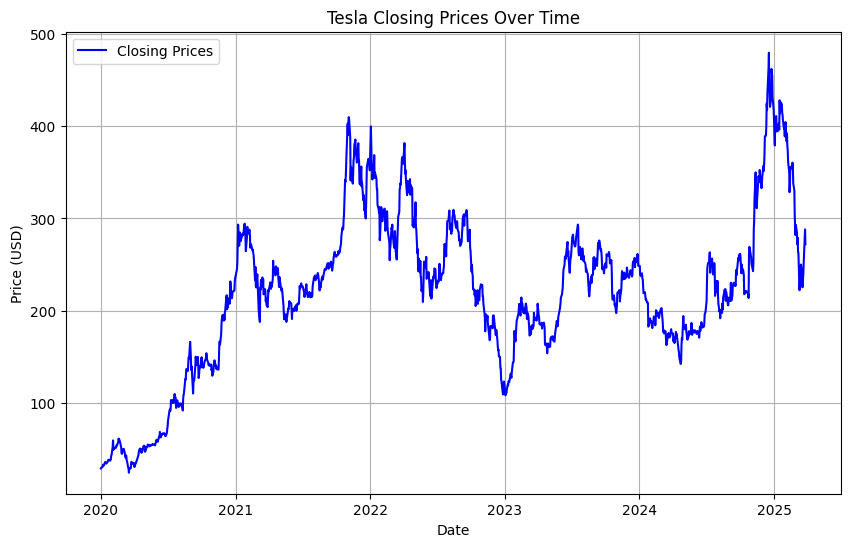

In [12]:
import matplotlib.pyplot as plt

# Plot closing prices
plt.figure(figsize=(10, 6))
plt.plot(tesla_data.index, tesla_data['Close'], color='blue', label='Closing Prices')
plt.title('Tesla Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

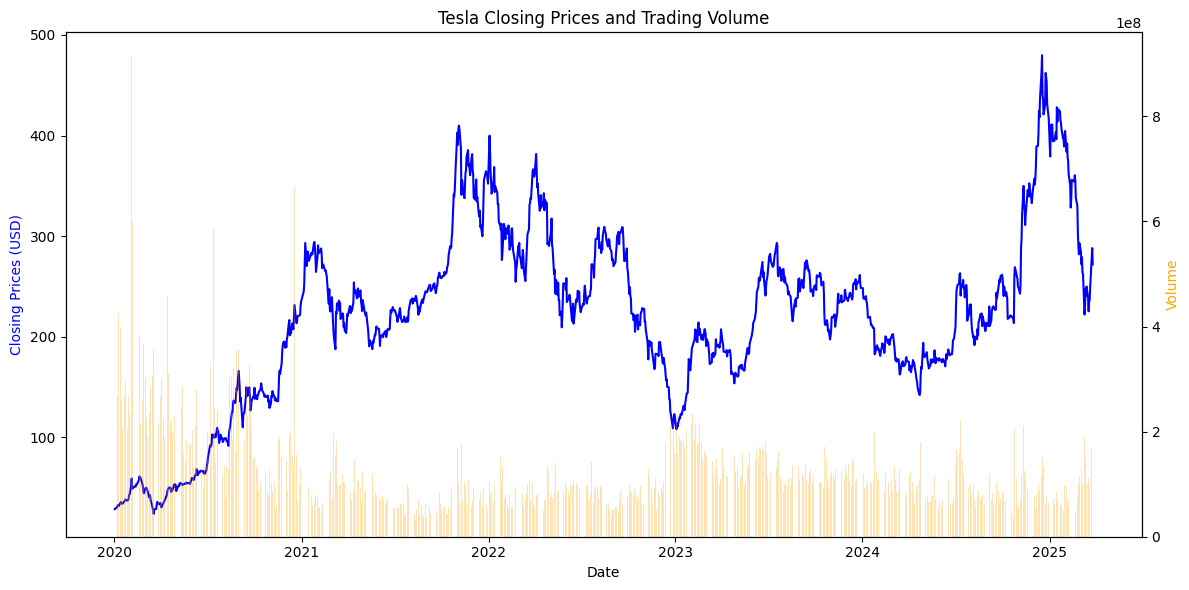

In [13]:
# Overlay closing prices and trading volume
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(tesla_data.index, tesla_data['Close'], color='blue', label='Closing Prices')
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Prices (USD)', color='blue')

ax2 = ax1.twinx()
ax2.bar(tesla_data.index, tesla_data['Volume'], alpha=0.3, color='orange', label='Trading Volume')
ax2.set_ylabel('Volume', color='orange')

plt.title('Tesla Closing Prices and Trading Volume')
fig.tight_layout()
plt.show()

In [14]:
# Add a 10-day Simple Moving Average (SMA)
tesla_data['SMA_10'] = tesla_data['Close'].rolling(window=10).mean()

# Add a 50-day Simple Moving Average (SMA)
tesla_data['SMA_50'] = tesla_data['Close'].rolling(window=50).mean()

In [15]:
# Calculate RSI
delta = tesla_data['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss
tesla_data['RSI'] = 100 - (100 / (1 + rs))

In [16]:
# Bollinger Bands (20-day SMA ± 2 standard deviations)
tesla_data['BB_Upper'] = tesla_data['SMA_10'] + 2 * tesla_data['Close'].rolling(window=10).std()
tesla_data['BB_Lower'] = tesla_data['SMA_10'] - 2 * tesla_data['Close'].rolling(window=10).std()

In [17]:
# Add lagged features
tesla_data['Lag_1'] = tesla_data['Close'].shift(1)
tesla_data['Lag_2'] = tesla_data['Close'].shift(2)

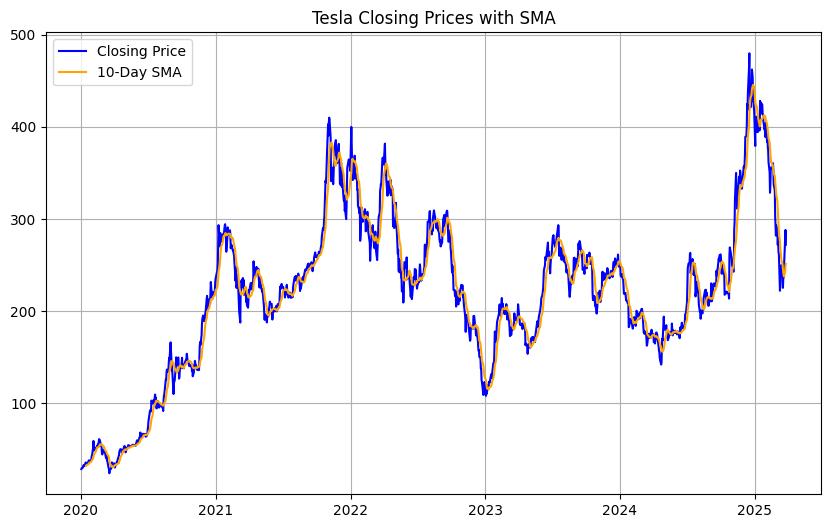

In [18]:
# Plot closing price and 10-day SMA
plt.figure(figsize=(10, 6))
plt.plot(tesla_data['Close'], label='Closing Price', color='blue')
plt.plot(tesla_data['SMA_10'], label='10-Day SMA', color='orange')
plt.title('Tesla Closing Prices with SMA')
plt.legend()
plt.grid()
plt.show()

In [20]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/11.1 MB 10.5 MB/s eta 0:00:01
   -------------- ------------------------- 3.9/11.1 MB 11.2 MB/s eta 0:00:01
   ---------------------- ----------------- 6.3/11.1 MB 11.0 MB/s eta 0:00:01
   ---------------------------- ----------- 7.9/11.1 MB 9.9 MB/s eta 0:00:01
   -------------------------------- ------- 8.9/11.1 MB 8.9 MB/s eta 0:00:01
   --------------------------------- ------ 9.4/11.1 MB 7.9 MB/s eta 0:00:01
   ---------------------------------- ----- 9.7/11.1 MB 6.8 MB/s eta 0:00:01
   ------------------------------------ --- 10.2/11.1 MB 6.2 MB/s eta 0:00:01
   -------------------------------------- - 10.7/11.1 MB 5.7 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 5.5 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 5.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/40.9 MB ? eta -:--:--
    --

In [21]:
from sklearn.model_selection import train_test_split

# Define the input features (X) and target variable (y)
X = tesla_data[['SMA_10', 'SMA_50', 'RSI', 'Lag_1', 'Lag_2']]
y = tesla_data['Close']

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_rf = rf_model.predict(X_test)
print(f"RMSE: {mean_squared_error(y_test, y_pred_rf, squared=False):.2f}")

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices (Linear Regression)', color='orange')
plt.title('Actual vs. Predicted Tesla Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

In [23]:
print(X.isnull().sum())  # Count NaNs in each column

SMA_10     9
SMA_50    49
RSI       13
Lag_1      1
Lag_2      2
dtype: int64


In [25]:
X = X.fillna(X.mean())

In [27]:
# Forward fill missing values
X = X.ffill()

In [28]:
# Backward fill missing values
X = X.bfill()

In [33]:
X = X.drop(columns=['SMA_50', 'RSI'], errors='ignore')  # Example of dropping problematic features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

print("Model training complete!")

Model training complete!


In [35]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Display a comparison of actual vs. predicted prices
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=y_test.index)
print(comparison.head())

                Actual   Predicted
Date                              
2020-10-14  153.766663  149.180773
2024-08-16  216.119995  214.209563
2023-06-23  256.600006  264.543368
2021-02-25  227.406662  247.592080
2020-09-24  129.263336  127.294177


In [37]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (squared=True gives MSE, squared=False gives RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Manually calculate RMSE

# Calculate R²
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

RMSE: 9.48
R²: 0.99


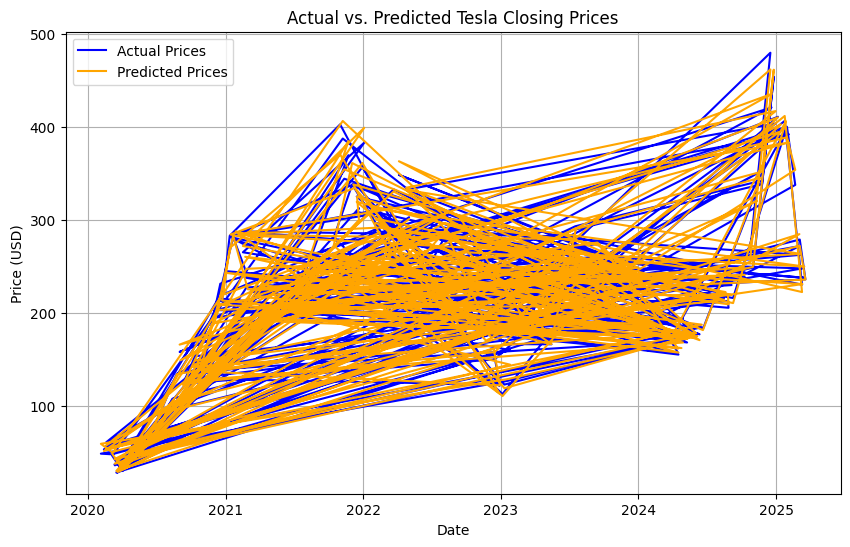

In [38]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='orange')
plt.title('Actual vs. Predicted Tesla Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

In [2]:
import pandas as pd
import yfinance as yf

# Load Tesla stock data
tesla_data = yf.download('TSLA', start='2020-01-01', end='2023-01-01')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
tesla_data.to_csv('processed_data.csv', index=True)
print("Processed data saved as 'processed_data.csv'")

Processed data saved as 'processed_data.csv'
